# Práctica 2: Manejo básico de ROS2

## Objetivo

Que el alumno haga uso de las funciones básicas de ROS2 (publicador y suscriptor) y de sus aplicaciones con turtlesim y rviz2

### Metas

Que el alumno:
- Integre texto en Markdown dentro de Jupyter
- Integre código de Python dentro de Jupyter
- Haga uso de la terminal de Ubuntu y contruya un script de bash
- Genere un repositorio en GitHub y comparta su archivo de práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.
- Para crear, innovar o evaluar las tecnologías relacionadas con la mecatrónica.

#### Actitudes profesionales

- Ser creativo e innovador.
- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### Actitudes de tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

### La evaluación de la práctica contará de los siguientes puntos

| Elemento | Porcentaje |
| ------:| ----------- |
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

### Se evaluará con los siguientes criterios:

| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 

## Introducción

### ROS2

ROS 2 (Robot Operating System 2) es un conjunto de bibliotecas y herramientas que permiten desarrollar software para robots de forma modular, distribuida y escalable.
En ROS 2, los programas se comunican entre sí mediante mensajes que viajan sobre una red (incluso entre computadoras distintas), usando un sistema de comunicación llamado DDS (Data Distribution Service).

<img src="imagenes/ROS2_logo.webp" alt = "ROS2" height="100" display= "block"/>

#### Nodos

Un nodo es la unidad básica de ejecución en ROS 2.
Cada nodo es un programa que realiza una tarea específica dentro del sistema del robot: leer un sensor, controlar un motor, procesar imágenes, etc.
En Python, los nodos se definen a partir de la clase base rclpy.node.Node.
~~~python
from rclpy.node import Node

class Nodo(Node):
    def __init__(self):
        super().__init__('nombre_nodo')
        self.get_logger().info("Nodo iniciado")
~~~

#### Tópicos

Los tópicos (topics) son canales de comunicación asíncrona y continua entre nodos.
Un nodo publica mensajes en un tópico, y otros nodos se suscriben para recibirlos.
Todos los mensajes que viajan por un tópico tienen un tipo de dato definido, por ejemplo:
- std_msgs/msg/String
- geometry_msgs/msg/Twist

Por ejemplo:

- Un nodo A (sensor) publica temperaturas en el tópico /temperatura.
- Otro nodo B (monitor) se suscribe a /temperatura y muestra los valores.

Para generar un publicador, se crea un publicador definiendo el tipo de mensaje y el tópico por el que se publica. Después se manda a llamar al publicador para mandar un mensaje.
~~~python
  topic_name = "/topic"
  self.publisher = self.create_publisher(String, topic_name, 10)

  msg = String()
  msg.data = "Message"
  self.publisher.publish(msg)
~~~
Para generar un subscriptor:
~~~python 
  topic_name = "/topic"
  self.subscription = self.create_subscription(
    String, topic_name, self.listener_callback, 10)
~~~

#### Servicios

Los servicios (services) son una forma de comunicación sincrónica (de solicitud–respuesta). Funcionan como una llamada a función entre nodos: uno envía una solicitud (request), y el otro responde con un resultado (response).

Los servicios se usan para operaciones puntuales, no continuas (por ejemplo, mover un robot a una posición, tomar una foto, guardar datos, etc.).

Por ejemplo:

- Un nodo A (cliente) pide: “calcula la suma de 2 y 3”.
- Otro nodo B (servidor) responde: “la suma es 5”.

Para crear un servidor, hay que crear el objeto y la función que se llama al recibir una solicitud

~~~python
  self.srv = self.create_service(AddTwoInts, server_name, self.add_two_ints_callback)
def add_two_ints_callback(self, request:AddTwoInts.Request, response:AddTwoInts.Response):
  response.sum = request.a + request.b
  self.get_logger().info("Recibido: a={}, b={}, respuesta={}".format(request.a, request.b, response.sum))
  return response
~~~

Para crear un cliente, hay que crear el objeto del cliente y la solicitud, enviarla, y definir la función que se llamará al recibir el objeto de la respuesta
~~~python
self.client = self.create_client(AddTwoInts, service_name)
# Esperamos al servicio
while not self.client.wait_for_service(timeout_sec=1.0):
  self.get_logger().info('Esperando al servicio {}...'.format(service_name))
request = AddTwoInts.Request()
request.a = self.a
request.b = self.b
# --- Manda solicitud
future = self.client.call_async(request)
# --- Función que se ejecuta al recibir respuesta
future.add_done_callback(self.callback_result)
~~~

#### Parámetros

Los parámetros son valores configurables que un nodo puede leer o modificar durante su ejecución.
Permiten ajustar el comportamiento del nodo sin cambiar el código.

Por ejemplo:

- Un nodo de control de motores puede tener un parámetro max_velocity de 0.1.
- Otro nodo puede cambiarlo a 0.5 sin interrumpir al primer nodo.

Por ejemplo, si en un nodo queremos que el tópico utilizado sea un parámetro
~~~python
self.declare_parameter("topic_param", "/topic")
topic_name = self.get_parameter("topic_param").value
~~~

Una forma gráfica de ver las comunicaciones en ROS2:

<img src="imagenes/Nodes-TopicandService.gif" height = "400" display = "block" alt = "Vosualización de las comunicaciones en ROS2"/>

### URDF (Unified Robot Description Format):

El URDF es un formato de archivo XML que se utiliza para describir la estructura de un robot, comunmente usado en ROS. Permite definir la composición física de un robot, incluyendo sus eslabones y juntas. Además, permite especificar características como el peso, la geometría, y la disposición espacial de los elementos del robot.

Un archivo URDF básico se construye a partir de **eslabones** y **juntas**.

#### Para definir un eslabón, se utiliza la estructura siguiente:
~~~xml
<!--Definición del eslabón-->
<link name = "nombre_del_eslabón">
  <!--
  Elementos visuales del eslabón 
  (modelos o formas geométricas)
  -->
  <visual>
      <!--
      Posición y rotación del elemento visual
      respecto al origen del eslabón
      -->
      <origin xyz = "x y z" rpy = "gamma beta alfa"/> 
        <!--Elementos visuales asociados a la junta-->
        <geometry> 
        <!--Primitiva visual (caja en este caso)-->
        <box size = "x y z"/> 
     </geometry>
        <!--Material usado para el elemento visual-->
        <material name = "nombre_del_material"> 
          <color rgba = "r g b a"/> 
        </material> 
  </visual> 
</link> 
~~~

Los elementos primitivos son formas geométricas básicas que se utilizan para representar las partes de un robot en URDF. Algunos de los más comunes son:

- **Caja (box)**: Un paralelepípedo definido por su ancho, alto y profundidad.
>~~~xml
>  <box size = "x y z"/> 
>~~~
- **Cilindro (cylinder)**: Definido por su radio y longitud.
>~~~xml
>  <cylinder radius = "r" length="l"/> 
>~~~
- **Esfera (sphere)**: Definida por su radio.
>~~~xml
>  <sphere radius = "r"/> 
>~~~
- **Malla (mesh)**: Permite importar geometrías más complejas en formatos como STL, Collada, obj, entre otros.
>~~~xml
>  <mesh filename = "ruta/al/archivo"/> 
>~~~

Se puede agregar cómo se desplegarán estos elementos a través de un **material**: 
- **Color**: Color plano con el que se despliega el elemento, definido por componentes rgb y transparencia (alfa).
>~~~xml
> <material name = "Nombre"> 
>   <color rgba = "r g b a"/> 
> </material> 
>~~~
- **Textura**: Imagen que se despliega sobre el modelo.
>~~~xml
> <material name = "Nombre"> 
>   <texture filename = "ruta/al/archivo"/> 
> </material> 
>~~~

#### Para una junta: 
~~~xml
<!--Definición de la junta-->
<joint name = "nombre_de_la_junta" type = "tipo_de_junta"> 
  <!--
  Eslabones padre e hijo
  - Padre: Eslabón respecto al cual se mide la rotació o traslación
  - Hijo: Eslabón que se desplaza o rota
  -->
  <parent link = "eslabon_padre_(fijo)"/> 
  <child link = "eslabon_hijo_(movible)"/> 
  <origin xyz = "x y z" rpy = "gamma beta alfa"/> 
  <!--Eje de rotación  (1: se mueve. 0: no se mueve)-->
  <axis xyz = "x y z"/> 
  <!--Límites 
  - effort: par máximo
  - velocity: velocidad absoluta máxima
  - lower-upper: posición mínima y máxima-->
  <limit effort="10.0" lower="-3.14" upper="3.14" velocity="3.14"/>
</joint>
~~~
En el formato URDF, existen varios tipos de juntas que pueden definir el movimiento relativo entre las partes de un robot:

- **Junta fija**: No permite ningún movimiento entre los elementos conectados.
>~~~xml
> <joint name = "nombre_de_la_junta" type = "fixed"> 
>~~~
- **Junta rotacional**: Permite un movimiento de rotación alrededor de un eje.
>~~~xml
> <joint name = "nombre_de_la_junta" type = "revolute"> 
>~~~
- **Junta prismática**: Permite un movimiento lineal a lo largo de un eje.
>~~~xml
> <joint name = "nombre_de_la_junta" type = "prismatic"> 
>~~~
- **Junta continua**: Es una variación de la junta rotacional que permite una rotación sin límites.
>~~~xml
> <joint name = "nombre_de_la_junta" type = "continuous"> 
>~~~

### RVIZ


RViz (ROS Visualization) es una herramienta gráfica dentro del ecosistema de ROS que permite visualizar una amplia gama de información generada por robots. Esta herramienta es esencial para depurar, entender y visualizar los datos que se generan en tiempo real durante la simulación o la operación de un robot en un entorno físico.

<img src="imagenes/rviz.png" alt = "RViz" height="300" display= "block"/>


RViz soporta muchos tipos de visualizaciones, en este caso veremos:

- **Modelos 3D del robot (URDF)**: Puedes cargar y visualizar la descripción del robot usando su archivo URDF (Unified Robot Description Format). Esto te permite ver un modelo 3D del robot y observar cómo se mueve cada parte del robot (es decir, los eslabones y las juntas). También puedes ver cómo se actualiza en tiempo real cuando el robot cambia de posición.

- **Transformaciones (TF)**: ROS utiliza un sistema de coordenadas llamado TF (transformación de marcos) para definir la relación espacial entre diferentes partes del robot y el entorno. En RViz, puedes visualizar estos sistemas de referencia y las transformaciones entre ellos, lo que es útil para entender cómo se mueven y orientan los diferentes componentes del robot.
Esto incluye visualizar el origen de coordenadas del robot y sus partes móviles.

## Cuestionario previo

### Responder de forma breve las siguientes preguntas:

- ¿Qué es un ejecutor (executor) en ROS2?
> Es el componente de ROS2 responsable de gestionar y ejecutar las funciones callback (como las de subscriptores, timers o servicios) de los nodos. El ejecutor "espera" (con spin()) a que lleguen datos o eventos y se encarga de despachar ese trabajo a los nodos que tiene asignados.
- ¿Qué es la ejecución por hilos en python?
> Es una técnica que permite a un programa ejecutar múltiples tareas (llamadas hilos o threads) de forma concurrente, dando la ilusión de que se realizan al mismo tiempo dentro del mismo proceso. Es especialmente útil para manejar tareas que implican espera (como operaciones de red o el spin() de ROS), permitiendo que el programa principal siga activo mientras un hilo espera.
- ¿Qué ventajas tiene ejecutar un programa en un hilo secundario?
> La ventaja principal es que no bloquea el hilo principal. Permite que tareas largas o que entran en un bucle de espera (como executor.spin()) se ejecuten en segundo plano, mientras el programa principal (en este caso, la celda de Jupyter) sigue respondiendo y permitiendo ejecutar más instrucciones.
- ¿Qué pasaría si se utiliza un comando que se queda en periodo de espera (como rclpy.spin()) dentro de un entorno de celdas como jupyter?
> La celda de Jupyter se bloquearía permanentemente. El kernel de Jupyter (el motor que ejecuta el código) quedaría "ocupado" (usualmente marcado como In [*]) esperando a que rclpy.spin() termine, lo cual nunca sucede por sí solo. Esto impediría que se puedan ejecutar otras celdas o interactuar con el notebook.TA

*En caso de integrar imagenes, colocarlas en la carpeta "imagenes"*

## Desarrollo

### 1. Tópicos en ROS2

Inicializar ROS2 y importar dependencias

In [2]:
import rclpy
from rclpy.node import Node
from std_msgs.msg import String
import threading
from rclpy.executors import MultiThreadedExecutor

Crear una clase que herede de nodo, que implemente un publicador y sus funciones

In [3]:
class SimplePublisher(Node):
    def __init__(self):
        # Constructor de inicio
        super().__init__('simple_publisher')
        self.publisher_ = self.create_publisher(String, 'topic', 10)
        self.timer = self.create_timer(1.0, self.timer_callback) # Timer de 1 segundo
        self.i = 0
        self.get_logger().info('Nodo Publicador [simple_publisher] iniciado.')

    def timer_callback(self):
        # Función de timer para publicar periódicamente cada segundo
        msg = String()
        msg.data = f'Hola ROS2: {self.i}'
        self.publisher_.publish(msg)
        self.get_logger().info(f'Publicando: "{msg.data}"')
        self.i += 1

Crear una clase que herede de nodo, que implemente un subscriptor y sus funciones

In [4]:
class SimpleSubscriber(Node):
    def __init__(self):
        # Constructor
        super().__init__('simple_subscriber')
        self.subscription = self.create_subscription(
            String,
            'topic',
            self.listener_callback,
            10)
        self.subscription  # Evitar advertencia de variable no usada
        self.get_logger().info('Nodo Subscriptor [simple_subscriber] iniciado.')

    def listener_callback(self, msg):
        # Función que se llama al recibir un mensaje
        self.get_logger().info(f'He recibido: "{msg.data}"')

Verificar si ROS2 está inicializado. Si no, inicializarlo. Utilizar la función rclpy.ok(), que nos devuelve el estado de ROS2

In [5]:
if not rclpy.ok():
    rclpy.init(args=None)
    print("RCLPY inicializado.")
else:
    print("RCLPY ya estaba inicializado.")

RCLPY inicializado.


Instanciar un ejecutor de ROS2 que se encargue de varios nodos de forma simultánea, y ejecutarlo en segundo plano para no bloquear la terminal

In [6]:
executor = MultiThreadedExecutor()
thread = threading.Thread(target=executor.spin, daemon=True)
thread.start()

Instanciar los nodos publicador y suscriptor y agregarlos al ejecutor

In [ ]:
pub_node = SimplePublisher()
sub_node = SimpleSubscriber()
executor.add_node(sub_node)
executor.add_node(pub_node)

[INFO] [1762970461.067312532] [simple_publisher]: Nodo Publicador [simple_publisher] iniciado.
[INFO] [1762970461.079223987] [simple_subscriber]: Nodo Subscriptor [simple_subscriber] iniciado.


True

[INFO] [1762970462.063549651] [simple_subscriber]: He recibido: "Hola ROS2: 0"
[INFO] [1762970462.066991621] [simple_publisher]: Publicando: "Hola ROS2: 0"
[INFO] [1762970463.062363937] [simple_publisher]: Publicando: "Hola ROS2: 1"
[INFO] [1762970463.066531101] [simple_subscriber]: He recibido: "Hola ROS2: 1"
[INFO] [1762970464.066736428] [simple_publisher]: Publicando: "Hola ROS2: 2"
[INFO] [1762970464.070530581] [simple_subscriber]: He recibido: "Hola ROS2: 2"
[INFO] [1762970465.080162652] [simple_publisher]: Publicando: "Hola ROS2: 3"
[INFO] [1762970465.083407091] [simple_subscriber]: He recibido: "Hola ROS2: 3"
[INFO] [1762970466.073589196] [simple_publisher]: Publicando: "Hola ROS2: 4"
[INFO] [1762970466.076452559] [simple_subscriber]: He recibido: "Hola ROS2: 4"
[INFO] [1762970467.099386897] [simple_publisher]: Publicando: "Hola ROS2: 5"
[INFO] [1762970467.102514758] [simple_subscriber]: He recibido: "Hola ROS2: 5"
[INFO] [1762970468.069998626] [simple_publisher]: Publicando: "H

Destruir los nodos para que dejen de ejecutarse

In [8]:
pub_node.destroy_node()
sub_node.destroy_node()

Que detenga el proceso de ROS2 en caso de que siga activo (para evitar procesos en segundo plano)

In [10]:
if rclpy.ok():
    rclpy.shutdown()

## 2. Servicios en ROS2
En esta sección se implementan un servidor y un cliente de servicios ROS2 usando Jupyter Notebook.
Se utilizará el servicio estándar `Trigger` y un ejecutor multihilo para permitir que ambos nodos trabajen de forma simultánea dentro del entorno interactivo.

### Importar dependencias necesarias
Se inicializan las librerías de ROS2, hilos, ejecutores y tipos de mensajes/servicios.

In [ ]:
import rclpy
from rclpy.node import Node
from std_msgs.msg import String

import threading
from rclpy.executors import MultiThreadedExecutor
from rclpy.task import Future

### Crear la clase `Server`
El nodo servidor implementa un servicio tipo `Trigger`, el cual responde con un mensaje de confirmación cada vez que recibe una solicitud.

In [ ]:
from std_srvs.srv import Trigger

class Server(Node):
    def __init__(self):
        super().__init__('server_node')
        self.srv = self.create_service(
            Trigger,            # <-- tipo de servicio válido
            'mi_servicio',      # nombre del servicio
            self.callback
        )
        self.get_logger().info('Servidor listo.')

    def callback(self, request, response):
        response.success = True
        response.message = "Hola desde el servidor!"
        self.get_logger().info("Servidor recibió una solicitud.")
        return response

### Crear la clase `Client`
El cliente espera a que el servicio esté disponible y luego envía solicitudes cada segundo usando un `timer`.
La respuesta recibida se muestra en consola.


In [ ]:
from std_srvs.srv import Trigger
from rclpy.task import Future

class Client(Node):
    def __init__(self):
        super().__init__('client_node')
        self.cli = self.create_client(Trigger, 'mi_servicio')

        while not self.cli.wait_for_service(timeout_sec=1.0):
            self.get_logger().info('Esperando al servidor...')

        self.timer = self.create_timer(1.0, self.timer_callback)
        self.get_logger().info('Cliente iniciado.')

    def timer_callback(self):
        req = Trigger.Request()
        future = self.cli.call_async(req)
        future.add_done_callback(self.callback_result)

    def callback_result(self, future: Future):
        try:
            resultado = future.result()
            self.get_logger().info(
                f"Respuesta: success={resultado.success}, msg='{resultado.message}'"
            )
        except Exception as e:
            self.get_logger().error(f"Error: {e}")

### Inicializar ROS2 si aún no está activo
Se utiliza `rclpy.ok()` para verificar si ROS2 ya fue inicializado dentro del entorno de Jupyter.

In [ ]:
if not rclpy.ok():
    rclpy.init(args=None)

### Crear y ejecutar un `MultiThreadedExecutor`
El ejecutor permite manejar múltiples nodos al mismo tiempo.
Se ejecuta en segundo plano usando un hilo para evitar bloquear Jupyter.

In [ ]:
executor = MultiThreadedExecutor()
thread = threading.Thread(target=executor.spin, daemon=True)
thread.start()

### Instanciar los nodos y agregarlos al ejecutor
Aquí se crean el servidor y el cliente, y se agregan al ejecutor.
Las salidas informativas aparecen automáticamente como evidencia del funcionamiento del servicio.

In [ ]:
server_node = Server()
client_node = Client()

executor.add_node(server_node)
executor.add_node(client_node)

[INFO] [1763148367.933585942] [server_node]: Servidor listo.
[INFO] [1763148367.941533420] [client_node]: Cliente iniciado.


True

[INFO] [1763148368.941983942] [server_node]: Servidor recibió una solicitud.
[INFO] [1763148368.945365775] [client_node]: Respuesta: success=True, msg='Hola desde el servidor!'
[INFO] [1763148369.943690470] [server_node]: Servidor recibió una solicitud.
[INFO] [1763148369.950242136] [client_node]: Respuesta: success=True, msg='Hola desde el servidor!'
[INFO] [1763148370.946783897] [server_node]: Servidor recibió una solicitud.
[INFO] [1763148370.957991859] [client_node]: Respuesta: success=True, msg='Hola desde el servidor!'
[INFO] [1763148371.943248125] [server_node]: Servidor recibió una solicitud.
[INFO] [1763148371.950396768] [client_node]: Respuesta: success=True, msg='Hola desde el servidor!'
[INFO] [1763148372.948031736] [server_node]: Servidor recibió una solicitud.
[INFO] [1763148372.954526965] [client_node]: Respuesta: success=True, msg='Hola desde el servidor!'


### Destruir los nodos
Se eliminan los nodos del servidor y cliente para detener su ejecución limpia dentro del entorno.

In [ ]:
server_node.destroy_node()
client_node.destroy_node()

### Apagar ROS2
Si ROS2 sigue activo, se ejecuta `rclpy.shutdown()` para evitar procesos en segundo plano.

In [ ]:
if rclpy.ok():
    rclpy.shutdown()

## 3. URDF y RViz

En esta sección, se creará un archivo URDF de un robot tipo RRR con la siguiente disposición:
<div align="center">
<img src="images/modelo_robot.png" alt = "Robot RRR" width="300" height="300"/>
</div>

** Se pueden utilizar formas geométricas sencillas
** Mantener las dimensiones menores a 0.5 \[m]. 

#### Despliegue de un modelo URDF con configuraciones predeterminadas en RViz
Ahora, se tomará el archivo URDF realizado y se desplegará en RViz utilizando algunas configuraciones predeterminadas. 
Para desplegar el archivo en RViz, se deben instalar algunas librerías:

Para descargar un paquete que contiene un launch para desplegar al robot
> $ sudo apt-get install ros-humble-urdf-tutorial

Instalar la librería que permite a ROS manipular los URDF (xacro)
> $ sudo apt install ros-humble-xacro

Hay que verificar las juntas del archivo. RViz requiere que las juntas tengan límites definidos, agregando el parámetro
``` xml 
<limit effort="XX" velocity="XX" lower="XX" upper="XX" />
```
Siendo "XX" los valores deseados para cada parámetro.

Con estos cambios, se puede correr el despliegue del modelo con un archivo *.launch del paquete urdf-tutorial 

> $ ros2 launch urdf_tutorial display.launch.py model:=/home/robousr/<ruta_del_modelo>/<nombre_del_modelo>.urdf



Como entregable, agregar una imagen del modelo desplegado en RViz y una celda con el código xml del modelo urdf

<div align="center">
<img src="imagenes/modelo_desplegado.png" alt = "Primer despliegue en RViz" width="300" height="300" display= "block"/>
</div>

### Código urf

~~~xml
  <robot name="rrr_robot"> 
  <!--Definición de eslabones--> 
<link name = "base_link">
  <visual>
      <origin xyz = "0 0 0.05" rpy = "0 0 0"/> 
        <geometry> 
          <box size = "0.2 0.2 0.1"/> 
        </geometry> 
        <material name = "Black"> 
        <color rgba = "0 0 0 1.0"/> 
      </material> 
    </visual> 
</link> 
 
<link name = "shoulder_link"> 
   <visual> 
      <origin xyz = "0 0 0.15" rpy = "0 0 0"/> 
    <geometry> 
      <box size = "0.05 0.05 0.4"/> 
     </geometry> 
      <material name = "Green"> 
        <color rgba = "0 100.0 0 1.0"/> 
      </material> 
    </visual> 
  </link> 

<link name = "arm_link"> 
   <visual> 
      <origin xyz = "0.175 0 0" rpy = "0 0 0"/> 
    <geometry> 
      <box size = "0.4 0.05 0.05"/> 
     </geometry> 
      <material name = "Green"> 
        <color rgba = "0 100.0 0 1.0"/> 
      </material> 
    </visual> 
  </link> 
<link name = "forearm_link"> 
   <visual> 
      <origin xyz = "0.135 0 0.045" rpy = "0 0 0"/> 
    <geometry> 
      <box size = "0.32 0.04 0.04"/> 
     </geometry> 
      <material name = "Yellow"> 
        <color rgba = "1 1 0 1.0"/> 
      </material> 
    </visual> 
  </link> 

<link name = "final_link"> 
   <visual> 
      <origin xyz = "0 0 0" rpy = "0 0 0"/> 
    <geometry> 
      <box size = "0.03 0.03 0.3"/> 
     </geometry> 
      <material name = "Red"> 
        <color rgba = "225.0 0 0 1.0"/> 
      </material> 
    </visual> 
  </link>   
 
  <!--Definición de juntas--> 
<joint name = "shoulder_joint" type = "revolute"> 
  <parent link = "base_link"/> 
  <child link = "shoulder_link"/> 
  <origin xyz = "0 0 0.1" rpy = "0 0 0"/> 
  <axis xyz = "0 0 1"/> 
  <limit effort="10.0" lower="-3.14" upper="3.14" velocity="3.14"/>
</joint>

<joint name = "arm_joint" type = "fixed"> 
  <parent link = "shoulder_link"/> 
  <child link = "arm_link"/> 
  <origin xyz = "0 0 0.35" rpy = "0 0 0"/> 
  <axis xyz = "0 0 1"/> 
  <limit effort="10.0" lower="-3.14" upper="3.14" velocity="3.14"/>
</joint>
<joint name = "forearm_joint" type = "revolute"> 
  <parent link = "arm_link"/> 
  <child link = "forearm_link"/> 
  <origin xyz = "0.375 0 0" rpy = "0 0 0"/> 
  <axis xyz = "0 0 1"/> 
  <limit effort="10.0" lower="-3.14" upper="3.14" velocity="3.14"/>
</joint>
<joint name = "final_joint" type = "prismatic"> 
  <parent link = "forearm_link"/> 
  <child link = "final_link"/> 
  <origin xyz = "0.3 0 0" rpy = "0 0 0"/> 
  <axis xyz = "0 0 1"/> 
  <limit effort="10.0" lower="-0.10" upper="0.16" velocity="3.14"/>
</joint>
 
</robot>
~~~

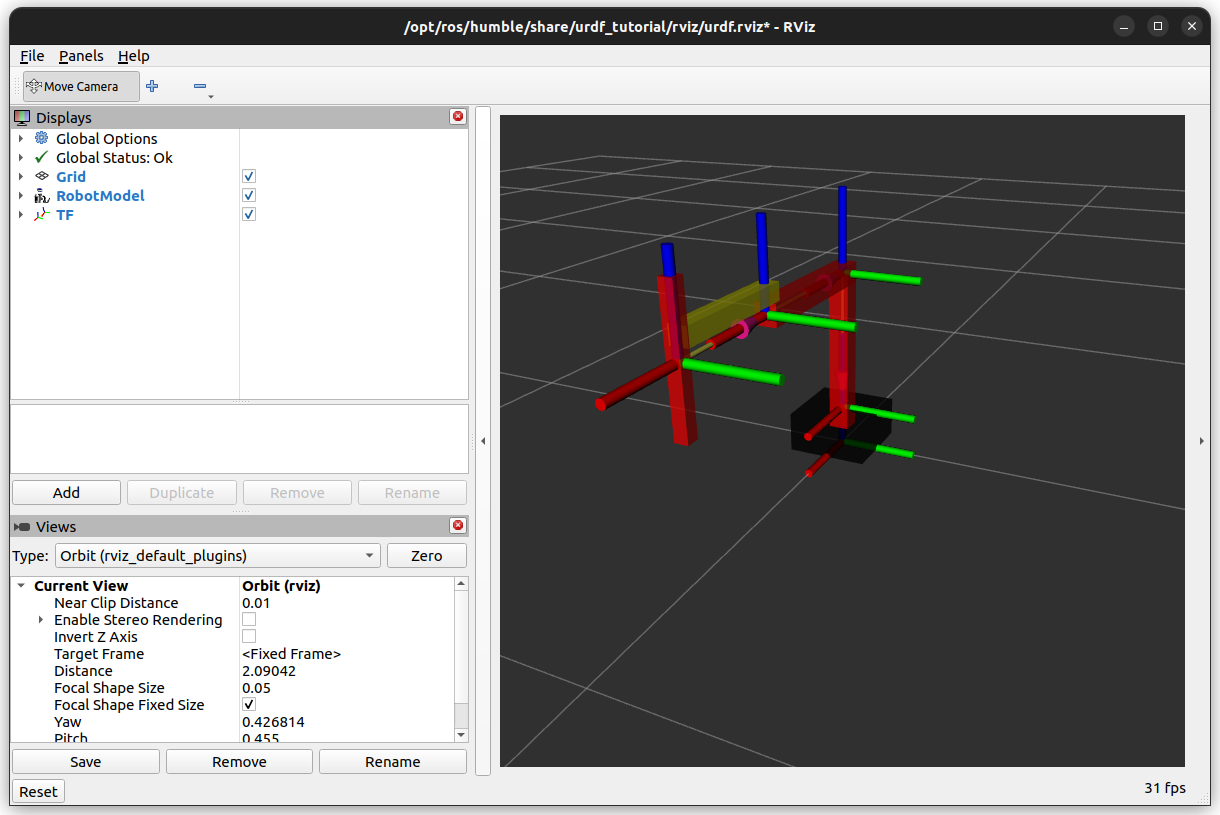

## Análisis de resultados

¿Cuáles son las ventajas o desventajas de usar el protocolo de comunicación publicador/suscriptor ó cliente/servicio?
> El protocolo publicador/suscriptor ofrece la ventaja de permitir una comunicación asíncrona y flexible entre múltiples nodos, ya que un publicador puede enviar mensajes a varios suscriptores sin conocerlos directamente, lo que facilita la escalabilidad y el intercambio constante de datos, aunque no garantiza una respuesta inmediata ni una comunicación dirigida. En cambio, el protocolo cliente/servicio permite una interacción directa y síncrona entre dos nodos, donde el cliente solicita información o una acción y el servicio responde, lo que brinda control y confirmación de la ejecución, pero limita la comunicación a una relación uno a uno y puede generar bloqueos si el servicio tarda en responder.

¿Cuál es la convención de ángulos que utilizan los archivos URDF para los ángulos de las juntas respecto al eslabón padre? (Intrínsecos/extrínsecos y el orden)
> En los archivos URDF, la convención utilizada para definir los ángulos de las juntas respecto al eslabón padre es la de rotaciones intrínsecas en el orden RPY (Roll–Pitch–Yaw), lo que significa que las rotaciones se aplican sucesivamente alrededor de los ejes X, Y y Z del propio sistema de coordenadas del eslabón padre. En esta convención, primero se realiza la rotación roll sobre el eje X, luego la pitch sobre el eje Y y finalmente la yaw sobre el eje Z, aplicándose cada una en el nuevo marco de referencia generado por la rotación anterior.

¿Qué utilidad tiene describir un robot en un archivo URDF?
> Es útil porque permite definir su estructura física y cinemática de forma estandarizada, especificando los eslabones, juntas, dimensiones, masas, materiales y relaciones entre cada parte. Esta descripción sirve como base para que herramientas de simulación, visualización y control en ROS 2, como RViz o Gazebo, puedan interpretar y representar correctamente el robot, facilitando su análisis, simulación de movimiento, detección de colisiones y planificación de trayectorias antes de implementarlo físicamente.




## Conclusiones

Logramos realizar exitosamente la práctica de Manejo Básico de ROS 2, cumpliendo nuestro objetivo fundamental de familiarizarnos con la arquitectura de comunicación Publisher/Subscriber. La implementación de nodos y la verificación de su funcionamiento a través de rviz2 confirmaron nuestra correcta comprensión del flujo de mensajes en un entorno de visualización avanzado. Hemos alcanzado satisfactoriamente todas las metas técnicas establecidas: demostramos nuestra competencia en el uso de Jupyter al integrar tanto el código Python funcional para la lógica de los nodos como la documentación detallada utilizando texto en Markdown, una combinación que potencia la claridad y reproducibilidad de nuestros experimentos. Además, consolidamos habilidades operativas al hacer uso eficiente de la terminal de Ubuntu y construir un script de Bash, herramientas indispensables para la automatización de tareas de compilación y despliegue de nodos en el entorno de ROS 2. En resumen, esta práctica no solo validó nuestro entendimiento conceptual de la comunicación básica, sino que también estableció las bases técnicas y metodológicas esenciales para desarrollar y documentar proyectos de robótica más complejos en el ecosistema ROS 2.



## Bibliografía 
- Executor and Spin Explained | Introduction to ROS2 and Robotics. (s. f.). Introduction To ROS2 And Robotics. https://www-learnros2-com.translate.goog/ros/tutorials/executor-and-spin-explained?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc&_x_tr_hist=true
- Cómo Usar Hilos (Threads) en Python. (2022, 3 noviembre). Código Pitón. https://www.codigopiton.com/como-usar-hilos-o-threads-en-python/#:~:text=con%20demasiada%20informaci%C3%B3n.-,C%C3%B3mo%20crear%20hilos%20en%20Python,indic%C3%A1ndole%20el%20c%C3%B3digo%20a%20ejecutar.
- (S.f.). Multiprocesamiento en Python: Guía de hilos y procesos. Datacamp.com. Recuperado el 15 de noviembre de 2025, de https://www.datacamp.com/es/tutorial/python-multiprocessing-tutorial

